# Data Preprocessing

### Import Libraries

In [2]:
import librosa
import librosa.display
from os import listdir
%matplotlib inline
import matplotlib.pyplot as plt
import IPython.display as ipd

### DataGTZAN music/speech collection

The Dataset collected for the purposes of music/speech discrimination. 
The dataset consists of 120 tracks, each 30 seconds long. 
Each class (music/speech) has 60 examples. 
The tracks are all 22050Hz Mono 16-bit audio files in .wav format.

Source : http://marsyas.info/downloads/datasets.html

In [3]:
CorpusPath = 'Data/gtzan-musicspeech-collection/Corpus/'
Corpusfiles = listdir(CorpusPath)

### Explore a shorter audio sample

In [4]:
import random
selected = random.choice(Corpusfiles)
print('Playing the file: '+selected)
ipd.Audio(CorpusPath+selected) 

Playing the file: amal.wav


### Take a look at its Spectrogram

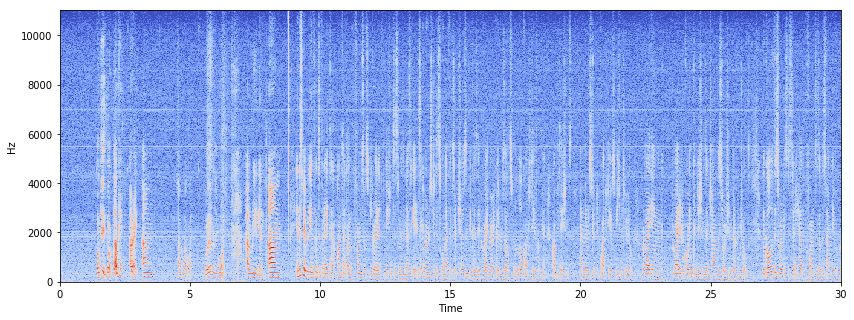

In [5]:
x, Fs = librosa.load(CorpusPath+selected)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=Fs, x_axis='time', y_axis='hz')

### Import Basic Labeling Data

This was manually labels by me. Each audio clip is classified into Music/Speech. A '1' represents Music and '0' represents Speech.

In [6]:
import pandas as pd
basicdata = pd.read_csv('Data/gtzan-musicspeech-collection/datalables.txt')
basicdata.head()
basicdata.shape

(128, 2)

In [7]:
n_mfcc = 120
%store n_mfcc
mfcccol = ['Filename']+['MFC'+str(i) for i in range(n_mfcc)]
# melcol = ['Filename']+['Mel'+str(j) for j in range(128)]

mfccdata = pd.DataFrame(columns=mfcccol)
# meldata = pd.DataFrame(columns=melcol)

Stored 'n_mfcc' (int)


### Compute the MFCC and Mel Coefficients

In [8]:
import numpy as np

for file in Corpusfiles:
    x, Fs = librosa.load(CorpusPath+file)
    MFCCS = np.mean(librosa.feature.mfcc(y=x, sr=Fs, n_mfcc=n_mfcc).T,axis=0)
#     Mels   = np.mean(librosa.feature.melspectrogram(x, sr=Fs).T,axis=0)
    mfcrow   = [file]+list(MFCCS)
    mfccdata.loc[len(mfccdata)] = mfcrow
#     melrow   = [file]+list(Mels)
#     meldata.loc[len(meldata)] = melrow

In [9]:
mfccdata = mfccdata.sort_values(['Filename'])
# meldata = meldata.sort_values(['Filename'])

In [10]:
mfccdata.head()

,Filename,MFC0,MFC1,MFC2,MFC3,MFC4,MFC5,MFC6,MFC7,MFC8,...,MFC110,MFC111,MFC112,MFC113,MFC114,MFC115,MFC116,MFC117,MFC118,MFC119
41,acomic.wav,-229.321994,108.632267,-7.654047,18.624785,-2.181688,-6.630272,-2.582729,-4.635557,-13.527221,...,1.167922,0.669183,0.642407,0.701864,0.424818,0.511580,0.582216,0.351582,0.390874,0.539783
75,acomic2.wav,-348.617529,98.462203,17.148644,26.328356,13.673916,10.471413,-0.361805,1.313543,-3.650878,...,1.049381,0.772271,0.689499,0.529716,0.785777,0.418954,0.428017,0.139025,0.504105,0.731900
65,allison.wav,-225.887249,81.504204,-17.323344,25.768934,12.924024,0.663791,-7.933903,4.003645,0.505937,...,0.112354,-0.212604,0.865215,0.602190,-0.634504,-0.246422,-0.088796,0.687212,-0.477974,-0.682673
92,amal.wav,-256.364286,76.938046,-8.520288,15.298515,-1.943931,4.816608,-15.251284,-3.793362,-1.792106,...,-0.115955,-0.917524,-0.147436,-0.033990,-1.333924,-0.570854,-0.654375,0.710945,-0.477626,-0.891172
0,austria.wav,-237.621329,77.945700,-4.441962,21.351329,9.463467,1.728774,-8.628446,4.327470,-6.817233,...,-0.294717,-0.764784,0.037911,0.263722,-1.100497,-0.453134,-0.347720,0.847099,-0.391633,-0.731279


In [11]:
# meldata.head()

### Combine All Features

In [12]:
masterdata = pd.merge(basicdata, mfccdata, on='Filename')
# masterdata = pd.merge(masterdata, meldata, on='Filename')

In [13]:
masterdata.head()

,Filename,Music,MFC0,MFC1,MFC2,MFC3,MFC4,MFC5,MFC6,MFC7,...,MFC110,MFC111,MFC112,MFC113,MFC114,MFC115,MFC116,MFC117,MFC118,MFC119
0,acomic2.wav,0,-348.617529,98.462203,17.148644,26.328356,13.673916,10.471413,-0.361805,1.313543,...,1.049381,0.772271,0.689499,0.529716,0.785777,0.418954,0.428017,0.139025,0.504105,0.731900
1,acomic.wav,0,-229.321994,108.632267,-7.654047,18.624785,-2.181688,-6.630272,-2.582729,-4.635557,...,1.167922,0.669183,0.642407,0.701864,0.424818,0.511580,0.582216,0.351582,0.390874,0.539783
2,allison.wav,0,-225.887249,81.504204,-17.323344,25.768934,12.924024,0.663791,-7.933903,4.003645,...,0.112354,-0.212604,0.865215,0.602190,-0.634504,-0.246422,-0.088796,0.687212,-0.477974,-0.682673
3,amal.wav,0,-256.364286,76.938046,-8.520288,15.298515,-1.943931,4.816608,-15.251284,-3.793362,...,-0.115955,-0.917524,-0.147436,-0.033990,-1.333924,-0.570854,-0.654375,0.710945,-0.477626,-0.891172
4,austria.wav,0,-237.621329,77.945700,-4.441962,21.351329,9.463467,1.728774,-8.628446,4.327470,...,-0.294717,-0.764784,0.037911,0.263722,-1.100497,-0.453134,-0.347720,0.847099,-0.391633,-0.731279


### Normalise All Features

In [14]:
from sklearn.preprocessing import StandardScaler

x = masterdata.iloc[:,2:].values 
x_scaled= StandardScaler().fit_transform(x)
normfeatures = pd.DataFrame(x_scaled)

In [15]:
normfeatures.columns = [x+'_n' for x in list(masterdata.columns[2:])]

In [16]:
normfeatures.head()

,MFC0_n,MFC1_n,MFC2_n,MFC3_n,MFC4_n,MFC5_n,MFC6_n,MFC7_n,MFC8_n,MFC9_n,...,MFC110_n,MFC111_n,MFC112_n,MFC113_n,MFC114_n,MFC115_n,MFC116_n,MFC117_n,MFC118_n,MFC119_n
0,-1.851857,-0.212798,1.373875,-0.071861,0.700829,0.893598,0.617526,-0.247478,0.251445,0.110595,...,1.173127,0.842575,0.377947,0.674773,1.271230,0.285719,-0.156541,-0.423737,1.033564,1.273185
1,-0.078921,0.135031,0.334114,-0.769080,-0.809148,-0.633459,0.322082,-1.078498,-1.429986,-0.087750,...,1.387574,0.704246,0.297243,0.982795,0.872810,0.405891,-0.004539,-0.183963,0.943290,1.024558
2,-0.027874,-0.792783,-0.071235,-0.122492,0.629415,0.017848,-0.389774,0.128297,0.959137,2.595308,...,-0.522012,-0.478978,0.679081,0.804450,-0.296453,-0.577533,-0.665988,0.194644,0.250601,-0.557469
3,-0.480815,-0.948951,0.297800,-1.070126,-0.786506,0.388665,-1.363189,-0.960853,0.567898,-1.075768,...,-0.935036,-1.424875,-1.056354,-0.333857,-1.068461,-0.998448,-1.223508,0.221415,0.250878,-0.827296
4,-0.202263,-0.914488,0.468769,-0.522311,0.299855,0.112943,-0.482167,0.173532,-0.287621,0.107115,...,-1.258426,-1.219921,-0.738715,0.198834,-0.810808,-0.845719,-0.921223,0.375004,0.319436,-0.620373


In [17]:
masterdata = pd.concat([basicdata, normfeatures], axis=1)

### Create A Master Dataset

In [18]:
masterdata.head()

,Filename,Music,MFC0_n,MFC1_n,MFC2_n,MFC3_n,MFC4_n,MFC5_n,MFC6_n,MFC7_n,...,MFC110_n,MFC111_n,MFC112_n,MFC113_n,MFC114_n,MFC115_n,MFC116_n,MFC117_n,MFC118_n,MFC119_n
0,acomic2.wav,0,-1.851857,-0.212798,1.373875,-0.071861,0.700829,0.893598,0.617526,-0.247478,...,1.173127,0.842575,0.377947,0.674773,1.271230,0.285719,-0.156541,-0.423737,1.033564,1.273185
1,acomic.wav,0,-0.078921,0.135031,0.334114,-0.769080,-0.809148,-0.633459,0.322082,-1.078498,...,1.387574,0.704246,0.297243,0.982795,0.872810,0.405891,-0.004539,-0.183963,0.943290,1.024558
2,allison.wav,0,-0.027874,-0.792783,-0.071235,-0.122492,0.629415,0.017848,-0.389774,0.128297,...,-0.522012,-0.478978,0.679081,0.804450,-0.296453,-0.577533,-0.665988,0.194644,0.250601,-0.557469
3,amal.wav,0,-0.480815,-0.948951,0.297800,-1.070126,-0.786506,0.388665,-1.363189,-0.960853,...,-0.935036,-1.424875,-1.056354,-0.333857,-1.068461,-0.998448,-1.223508,0.221415,0.250878,-0.827296
4,austria.wav,0,-0.202263,-0.914488,0.468769,-0.522311,0.299855,0.112943,-0.482167,0.173532,...,-1.258426,-1.219921,-0.738715,0.198834,-0.810808,-0.845719,-0.921223,0.375004,0.319436,-0.620373


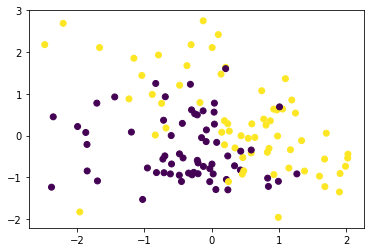

In [19]:
plt.scatter(masterdata.MFC0_n, masterdata.MFC1_n, c = masterdata.Music)

In [20]:
masterdata.to_csv('Data/MasterData.csv', index=False)

In [21]:
# Separate Features and Label
x = masterdata.loc[:, normfeatures.columns].values
y = masterdata.loc[:,['Music']].values

### Perform PCA To Identfie Relevant Columns

In [22]:
from sklearn.decomposition import PCA

n_pca = 50
pca = PCA(n_components=n_pca)
PCs = pca.fit_transform(x)
principalDf = pd.DataFrame(data = PCs, columns = ['PCA'+str(i) for i in range(n_pca)])
PCDf = pd.concat([principalDf, masterdata[['Music']]], axis = 1)
PCDf['Filename'] = basicdata['Filename']

In [23]:
PCDf.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA42,PCA43,PCA44,PCA45,PCA46,PCA47,PCA48,PCA49,Music,Filename
0,-3.816012,6.572316,0.347250,0.829393,0.001834,0.810930,-1.836805,-2.008000,1.262345,-0.050803,...,-1.443265,-0.239589,0.280315,1.147980,0.725233,0.549861,-0.363714,-0.101971,0,acomic2.wav
1,-3.963032,7.845675,0.781380,1.211285,-0.733665,-0.082552,-0.792448,-0.878920,0.424085,0.460887,...,-0.891295,-0.376305,0.490656,-0.065805,0.109681,0.276101,-0.359412,-0.553112,0,acomic.wav
2,5.148364,0.119405,0.155236,-3.167039,-3.202758,-0.554421,0.600480,1.951873,-0.675283,1.532033,...,0.325509,-1.531609,0.667297,0.379448,-0.788391,-0.175263,-0.809928,-0.317829,0,allison.wav
3,1.639687,0.367490,0.441764,-2.503467,0.725221,-1.860704,-0.336967,3.233178,-4.816601,-0.002228,...,0.253526,-0.314578,-0.395561,0.358883,-0.664901,0.108055,0.416500,0.213533,0,amal.wav
4,2.632253,0.906935,0.199317,-2.542599,-1.278079,-0.435696,-1.576462,1.763553,-2.774685,-1.105315,...,0.393921,-0.031789,0.556298,0.322125,0.009665,-0.541398,-0.555361,0.351066,0,austria.wav


### Explore the Variance Ration to Determine Relevant Features

array([0.11501671, 0.21222384, 0.29561228, 0.36462306, 0.4147823 ,
       0.45560491, 0.49419442, 0.53000832, 0.55850371, 0.58533677,
       0.60985224, 0.63406509, 0.65466693, 0.67362362, 0.69136163,
       0.70772161, 0.72296144, 0.73753292, 0.75163603, 0.76464697,
       0.77681183, 0.78885566, 0.8002431 , 0.81007319, 0.81981748,
       0.82868444, 0.83736113, 0.84585935, 0.85377916, 0.86138778,
       0.86861591, 0.87556893, 0.88184114, 0.88807759, 0.89385817,
       0.89934162, 0.90467208, 0.90973006, 0.91460743, 0.91935879,
       0.92385199, 0.92815351, 0.93223045, 0.9361865 , 0.93999482,
       0.9435294 , 0.94679565, 0.94991007, 0.95279999, 0.9556709 ])

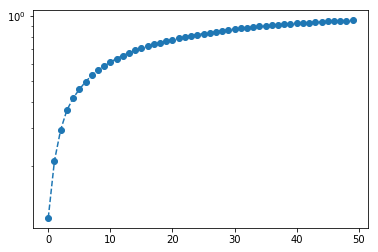

In [24]:
plt.semilogy(pca.explained_variance_ratio_.cumsum(), '--o')
# pca.explained_variance_ratio_
pca.explained_variance_ratio_.cumsum()

In [25]:
import pickle
pickle.dump(pca, open('PickledModels/'+pca.__class__.__name__, 'wb'))

### The analysis shows how each component captures of all information

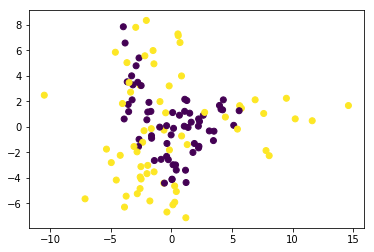

In [26]:
plt.scatter(PCDf.PCA0, PCDf.PCA1, c = PCDf.Music)

In [27]:
PCDf.to_csv('Data/PrincipalComponentData.csv', index=False)